# Ujian Tengah Semester

Lakukan analisa terhadap data pada  https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Coimbra  dengan menggunakan klasifikasi

- metode Naive Bayes Classifier

- metode pohon keputusan (Desision tree)

Proses analisa dilaporkan dan diupload di github ( menggunakan jupyter book)

## Naive Bayes Classifier

### Import data

In [2]:
import pandas as pd
import numpy as np

data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00451/dataR2.csv')
data

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1
...,...,...,...,...,...,...,...,...,...,...
111,45,26.850000,92,3.330,0.755688,54.6800,12.100000,10.96000,268.230,2
112,62,26.840000,100,4.530,1.117400,12.4500,21.420000,7.32000,330.160,2
113,65,32.050000,97,5.730,1.370998,61.4800,22.540000,10.33000,314.050,2
114,72,25.590000,82,2.820,0.570392,24.9600,33.750000,3.27000,392.460,2


### Eksplorasi data

In [3]:
data.head()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1


In [6]:
# Variabel independen
X = data.drop(columns=["Classification"])
#Cek apakah variabel target sudah dihapus
X.head()


,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920


In [7]:
# Variabel dependen
Y = data["Classification"]
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: Classification, dtype: int64

### Menentukan data testing dan data training.

In [8]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 123)

In [9]:
from sklearn.naive_bayes import GaussianNB
# Mengaktifkan/memanggil/membuat fungsi klasifikasi Naive Bayes
modelnb = GaussianNB()
# Memasukkan data training pada fungsi klasifikasi Naive Bayes
nbtrain = modelnb.fit(x_train, y_train)

In [10]:
# Menentukan hasil prediksi dari x_test
y_pred = nbtrain.predict(x_test)
y_pred

array([1, 2, 1, 1, 1, 2, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       2, 1])

In [11]:
np.array(y_test)

array([1, 2, 2, 2, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 1,
       2, 2])

In [12]:
# Menentukan probabilitas hasil prediksi
nbtrain.predict_proba(x_test)

array([[9.87787689e-01, 1.22123112e-02],
       [1.45791388e-12, 1.00000000e+00],
       [9.50308197e-01, 4.96918031e-02],
       [9.80202244e-01, 1.97977556e-02],
       [9.94829132e-01, 5.17086806e-03],
       [7.14621951e-03, 9.92853780e-01],
       [9.66508542e-01, 3.34914581e-02],
       [5.55854792e-01, 4.44145208e-01],
       [9.48288324e-69, 1.00000000e+00],
       [4.41615386e-08, 9.99999956e-01],
       [1.91309626e-17, 1.00000000e+00],
       [9.59192121e-01, 4.08078792e-02],
       [9.68869529e-01, 3.11304713e-02],
       [9.22729312e-01, 7.72706876e-02],
       [9.99217834e-01, 7.82165762e-04],
       [9.47186594e-01, 5.28134059e-02],
       [9.02404143e-18, 1.00000000e+00],
       [9.84266029e-01, 1.57339713e-02],
       [9.73657705e-01, 2.63422945e-02],
       [9.79374673e-01, 2.06253269e-02],
       [9.33943178e-01, 6.60568220e-02],
       [9.91441278e-01, 8.55872171e-03],
       [1.11566782e-02, 9.88843322e-01],
       [9.57616296e-01, 4.23837037e-02]])

In [13]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[8, 2],
       [9, 5]])

In [15]:
# Merapikan hasil confusion matrix
y_actual = pd.Series([1, 2, 2, 2, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 1,
       2, 2], name = "actual")
y_pred = pd.Series([1, 2, 1, 1, 1, 2, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       2, 1], name = "prediction")
df_confusion = pd.crosstab(y_actual, y_pred)

### Menampilkan tingkat akurasi dari klasifikasi 

In [16]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.47      0.80      0.59        10
           2       0.71      0.36      0.48        14

    accuracy                           0.54        24
   macro avg       0.59      0.58      0.53        24
weighted avg       0.61      0.54      0.52        24



## Decision Tree

### Import Modul



In [17]:
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn import tree
from matplotlib import pyplot as plt

### Scalling Data

In [19]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(x_train)

x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

### Decision tree classifier

In [20]:
clf = tree.DecisionTreeClassifier(criterion="entropy")
clf = clf.fit(x_train_scaled, y_train)

### Membuat grafik decision tree

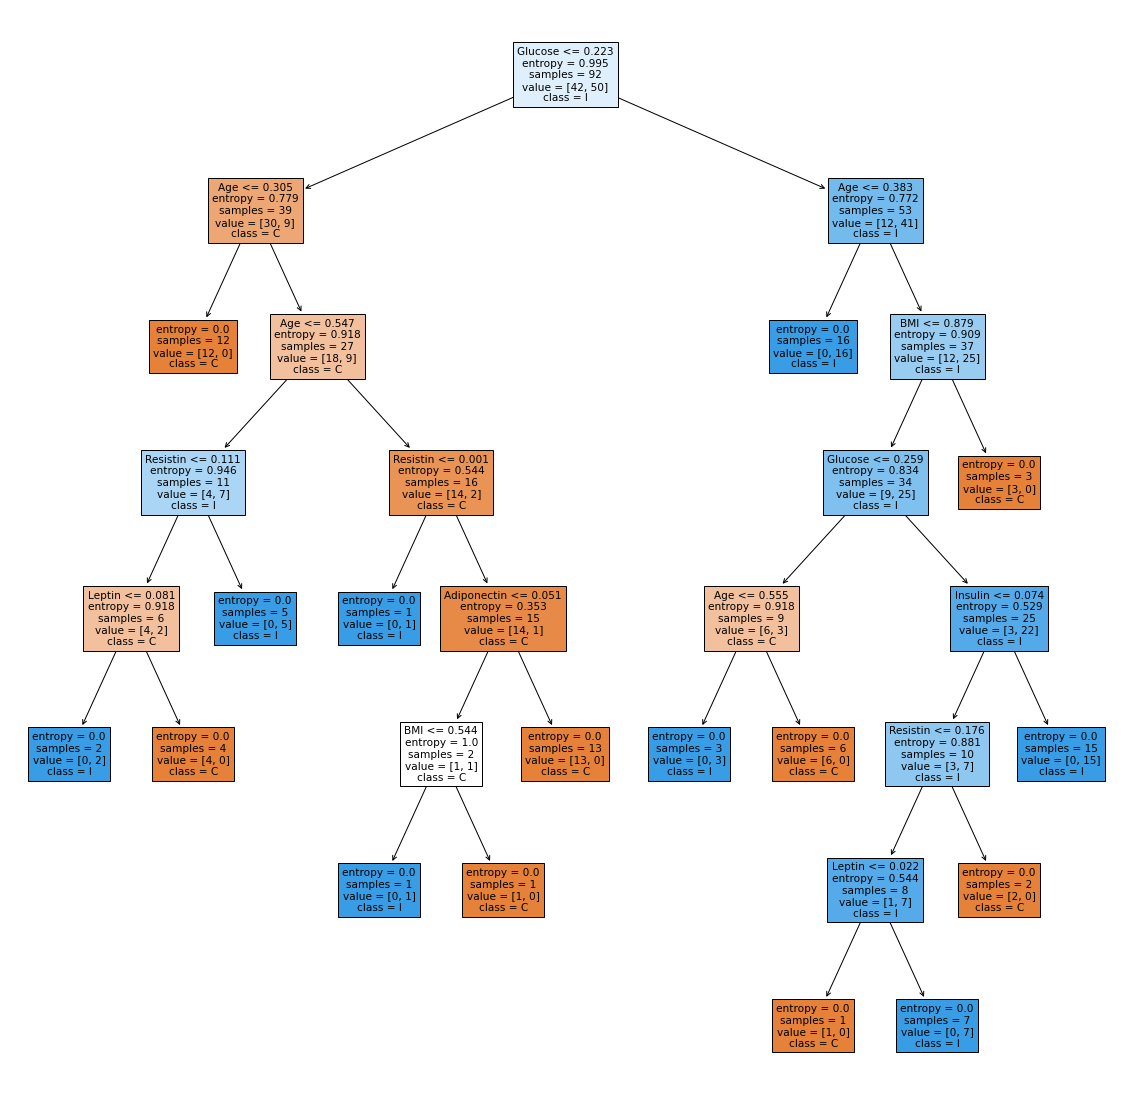

In [21]:
fig = plt.figure(figsize=(20,20))
_ = tree.plot_tree(clf, feature_names=list(data.columns.values)[:9], class_names=list(data.columns.values)[9] ,filled=True)

### Menampilkan skor data train dan data uji

In [22]:
print("Data Train : ", clf.score(x_train_scaled, y_train))
print("Data Test : ", clf.score(x_test_scaled, y_test))

Data Train :  1.0
Data Test :  0.625
